# **ANALISIS MODEL MACHINE LEARNING YANG DAPAT MENINGKATKAN CUSTOMER LIFETIME VALUE PERUSAHAAN PURWA INSURANCE**

# **A. BUSINESS UNDERSTANDING DAN PERUMUSAN MASALAH**

Customer Lifetime Values (CLV), dikutip dari crazyegg, secara sederhana dapat didefinisikan sebagai jumlah uang yang dikeluarkan oleh customer untuk bisnis tertentu sepanjang hubungannya dengan bisnis tersebut. CLV tidak hanya penting untuk menunjukkan jumlah uang yag dikeluarkan oleh customer terhadap sebuah bisnis, namun juga menunjukkan future value dari customer tersebut bila dapat terus dipertahankan (retain) oleh sebuah bisnis.

CLV merupakan angka penting bagi perusahaan karena menyiratkan besaran pertumbuhan sebuah perusahaan yang berbasis kepada customer. Selain itu ia juga akan memperlihatkan arti penting dan cara mempertahankan pelanggan lama di samping fitur-fitur penting dalam mendapatkan pelanggan baru.

Menurut Qualtrix, angka CLV dapat diperoleh dari formula dasar: 

        CLV = (customer revenue per year * duration of relationship in years) - total cost of acquiring and serving the customer

Dengan demikian dapat dikatakan bahwa semakin tinggi angka CLV maka akan semakin baik nilai customer tersebut bagi bisnis kita.

Dalam kasus ini, perusahaan 'Purwa Insurance' adalah sebuah perusahaan asuransi yang  dibidang otomotif. Perusahaan ini membutuhkan sebuah model yang dapat memprediksi cara meningkatkan besaran angka CLV-nya. 

Untuk itu disusunlah perumusan masalah bagi model machine learning  yang akan dibuat:

**B.1 Problem:**

Perusahaan Purwa Insurance ingin memiliki model prediksi guna meningkatkan angka Customer Lifetime Value-nya. Hal ini akan membuat upaya perusahaan akan lebih efisien dan efektif dalam mendapatkan (acquitition) dan merawat (retention) customer.

Untuk itu model machine learning diperlukan guna menentukan fitur-fitur penting apa yang diperlukan dalam asesmen customer berdasarkan Customer Lifetime Value-nya.

Degan demikian problem statementnya adalah: Bagaimana model machine learning yang dapat meningkatkan Customer Lifetime Value Purwa Insurance?

**B.2 Data:**

Model machine learning akan memprediksi 'Customer Lifetime Values' sebagai target (variabel y).

Sementara feature-feature (variabel X) yang akan digunakan untuk memprediksi adalah:

- Vehicle Class

- Coverage

- Renew Offer Type

- Employment Status

- Marital Status

- Education

- Number of Policies

- Monthly Premium Auto

- Total Claim Amount

- Income


**B.3 Machine Learning Objectives:**

Menemukan model machine learning yang dapat memprediksi  peningkatan customer lifetime value Purwa Insurance.

Karena target merupakan data yang bersifat numerikal, maka ada empat model yang akan diuji di sini:

1. Lasso regression

1. Decision Tree Regression

1. KNN Regression

1. Model ensemble: Extreme Gradient Boost


**B.4 Action:**

Perusahaan akan berfokus model dan fitur-fitur yang diprediksi memiliki dampak signifikan dalam peningkatan customer lifetime value, terutama terkait dengan customer acquitition dan retention.


**B.5 Value:**

Pada akhirnya diharapkan bahwa peningkatan CLV akan meningkatkan profit perusahaan ke depan. 


# **B. DATA UNDERSTANDING**

## B.1 Import Library

In [1]:
#instal category encoders

%pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [4]:
#Pengolahan DataFrame
import pandas as pd
import numpy as np

#Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

#Statistik
import statsmodels.api as sm

#Prepocessing
from sklearn.preprocessing import RobustScaler                  #untuk scalling menggunakan Robust Scaling
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder #untuk encoding menggunakan menggunakan one hot encoding dan ordinal encoding
from sklearn.compose import ColumnTransformer                   #untuk multiple column preprocess
import category_encoders as ce                                  #untuk ordinal encoder
from sklearn.model_selection import train_test_split            #untuk splitting data
from sklearn.preprocessing import PolynomialFeatures

#Model
from sklearn.linear_model import Lasso                          #Lasso             
from sklearn.neighbors import KNeighborsRegressor               #KNN         
from sklearn.tree import DecisionTreeRegressor                  #Decision Tree     
from xgboost.sklearn import XGBRegressor                        #Extreme Gradient Boost

from sklearn.pipeline import Pipeline                           #Pipeline

from sklearn.model_selection import cross_val_score, GridSearchCV   #Cross Validasi

from sklearn import metrics                                      #Akurasi

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error #Evaluasi Model

#Save Model
import pickle

import warnings
warnings.filterwarnings('ignore')                               #Menghilangkan warning

## B.2 Data

In [5]:
clv = pd.read_csv('/Users/andreardi/Desktop/Capstone Module 3/data_customer_lifetime_value.csv')
clv.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492



## B.3 Data Description

- Vehicle Class             : Tipe kelas kendaraan customer

- Coverage                  : Jenis pertanggungan asuransi customer

- Renew Offer Type          : Tipe pembaruan polis yang ditawarkan kepada customer

- Employment Status         : Status pekerjaan customer

- Marital Status            : Status pernikahan customer

- Education                 : Tingkat pendidikan customer

- Number of Policies        : Jumlah polis yang dimiliki customer

- Monthly Premium Auto      : Premi yang dibayarkan oleh customer perbulan (US$)

- Total Claim Amount        : Jumlah total klaim Customer (US$)

- Income                    : Pendapatan Customer (US$)

- Customer Lifetime Value   : Nilai dari CLV pelanggan

## B.4 Data Understanding: Shape

In [6]:
print(f'Jumlah baris dan kolom = {clv.shape}')

Jumlah baris dan kolom = (5669, 11)


## B.5 Data Understanding: Info


In [7]:
print(f'Info data clv: ')
clv.info()


Info data clv: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


Tidak ada data kosong

## B.6 Data understanding: describe data numerik

In [8]:
clv_num = clv[['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income', 'Customer Lifetime Value']]
clv_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Number of Policies,5669.0,2.979361,2.393187,1.000000,1.000000,2.000000,4.000000,9.000000
Monthly Premium Auto,5669.0,93.026989,34.551795,61.000000,68.000000,82.000000,109.000000,297.000000
Total Claim Amount,5669.0,431.407103,287.558038,0.423310,266.932542,379.200000,549.986128,2759.794354
Income,5669.0,37868.188569,30490.490723,0.000000,0.000000,34322.000000,62464.000000,99934.000000
Customer Lifetime Value,5669.0,8029.874592,6916.708246,1898.007675,3954.344534,5800.188903,9031.214859,83325.381190


# B.7 Data Understanding: Distribusi Normalitas Data dan Outliers Sebelum Preprocessing

<function matplotlib.pyplot.show(close=None, block=None)>

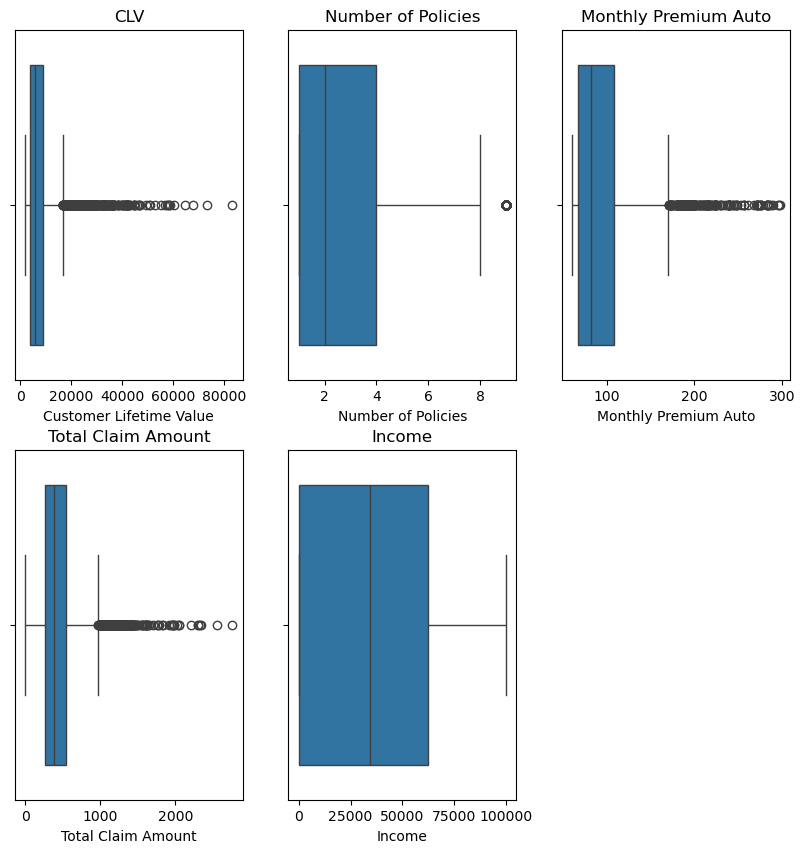

In [9]:
plt.figure(figsize=(10,10))

#clv
plt.subplot(231)
sns.boxplot(x=clv['Customer Lifetime Value'])
plt.title('CLV')

#Number of Policies
plt.subplot(232)
sns.boxplot(x=clv['Number of Policies'])
plt.title('Number of Policies')

#Monthly Premium Auto	
plt.subplot(233)
sns.boxplot(x=clv['Monthly Premium Auto'])
plt.title('Monthly Premium Auto')

#Total Claim Amount	
plt.subplot(234)
sns.boxplot(x=clv['Total Claim Amount'])
plt.title('Total Claim Amount')

#Income
plt.subplot(235)
sns.boxplot(x=clv['Income'])
plt.title('Income')


plt.show

Analisis:

- Hampir semua fitur numerikal memperlihatkan kecenderungan right skewed. Dengan demikian data tidak berdistribusi normal. Hal ini bermakna bahwa bila kemudian dibutuhkan pengujian hipotesis, maka akan digunakan statistik yang non-parametris.

- Sedangkan untuk outliers terdapat pada fitur 'Customer Lifetime Value', 'Number of Policies', 'Monthly Premium Auto', dan 'Total Claim Amount'. Data outliers ini nanti akan ditangani

### B.8 Menangani Outliers dengan Interquartile Range (IQR)

In [10]:
#Menghilangkan outliers pada Customer Lifetime Value


Q3=clv['Customer Lifetime Value'].quantile(0.75)
Q1=clv['Customer Lifetime Value'].quantile(0.25)
IQR = Q3 - Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

upper_price = np.where(clv['Customer Lifetime Value']>=upper)[0]
lower_price = np.where(clv['Customer Lifetime Value']<=lower)[0]

clv.drop(index=upper_price, errors='ignore', inplace=True)
clv.drop(index=lower_price, errors='ignore', inplace=True)


In [11]:
#Menghilangkan outliers pada Number of Policies

Q3=clv['Number of Policies'].quantile(0.75)
Q1=clv['Number of Policies'].quantile(0.25)
IQR = Q3 - Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

upper_price = np.where(clv['Number of Policies']>=upper)[0]
lower_price = np.where(clv['Number of Policies']<=lower)[0]

clv.drop(index=upper_price, errors='ignore', inplace=True)
clv.drop(index=lower_price, errors='ignore', inplace=True)


In [12]:
#Menghilangkan outliers pada Monthly Premium Auto

Q3=clv['Monthly Premium Auto'].quantile(0.75)
Q1=clv['Monthly Premium Auto'].quantile(0.25)
IQR = Q3 - Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

upper_price = np.where(clv['Monthly Premium Auto']>=upper)[0]
lower_price = np.where(clv['Monthly Premium Auto']<=lower)[0]

clv.drop(index=upper_price, errors='ignore', inplace=True)
clv.drop(index=lower_price, errors='ignore', inplace=True)


In [13]:
#Menghilangkan outliers pada Total Claim Amount

Q3=clv['Total Claim Amount'].quantile(0.75)
Q1=clv['Total Claim Amount'].quantile(0.25)
IQR = Q3 - Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

upper_price = np.where(clv['Total Claim Amount']>=upper)[0]
lower_price = np.where(clv['Total Claim Amount']<=lower)[0]

clv.drop(index=upper_price, errors='ignore', inplace=True)
clv.drop(index=lower_price, errors='ignore', inplace=True)


In [14]:
clv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4615 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            4615 non-null   object 
 1   Coverage                 4615 non-null   object 
 2   Renew Offer Type         4615 non-null   object 
 3   EmploymentStatus         4615 non-null   object 
 4   Marital Status           4615 non-null   object 
 5   Education                4615 non-null   object 
 6   Number of Policies       4615 non-null   float64
 7   Monthly Premium Auto     4615 non-null   float64
 8   Total Claim Amount       4615 non-null   float64
 9   Income                   4615 non-null   float64
 10  Customer Lifetime Value  4615 non-null   float64
dtypes: float64(5), object(6)
memory usage: 432.7+ KB


Dari proses data cleaning outliers data yang tersisa adalah 4615 baris

## B.9 Eksplorasi Matrix Korelasi Variabel Numerik

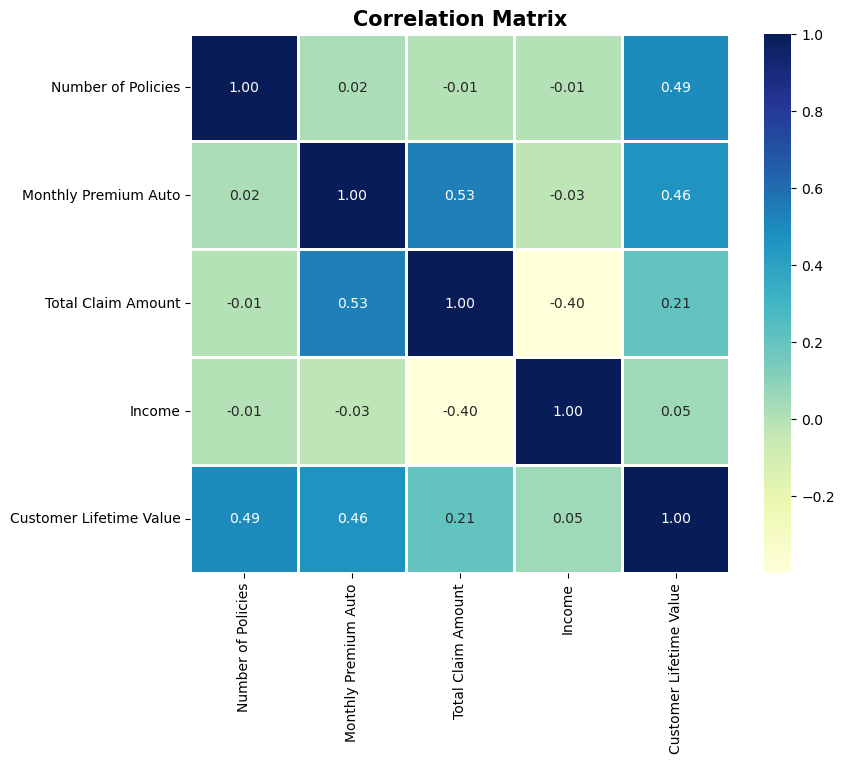

In [15]:
plt.figure(figsize=(9, 7))
palette=sns.diverging_palette(20, 220, n=256)
corr = clv_num.corr(method='spearman')
sns.heatmap(corr, annot=True, fmt='.2f', cmap="YlGnBu", square=True, linewidths=1)
plt.title('Correlation Matrix', size=15, weight='bold')
plt.show()

# Interpretasi:

- Dari tabel korelasi di atas terlihat bahwa variabel Customer Lifetime Value, sebagai target(y), memiliki korelasi yang kuat, secara berurutan, dengan variabel X:
    - Number of Policies
    - Monthly Premium Auto
    - Total Claim Amount
    - Income

- Ini juga mengisyaratkan bahwa perusahaan harus mengejar jumlah dari polis dan pembayaran premi nasabah guna meningkatkan angka Customer Lifetime Value

- Di samping itu perusahaan juga harus merawat dan memberi insentif bagi para pemegang polis lebih dari dan pembayar premi besar.

## B.10 Data Understanding: Describe Data Kategorikal

In [16]:
clv_cat = clv[['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus','Marital Status',  'Education' ]]
clv_cat.describe().T

,count,unique,top,freq
Vehicle Class,4615,6,Four-Door Car,2397
Coverage,4615,3,Basic,2867
Renew Offer Type,4615,4,Offer1,1843
EmploymentStatus,4615,5,Employed,2866
Marital Status,4615,3,Married,2725
Education,4615,5,Bachelor,1378


## B.11 Proporsi Fitur Vehicle Class

In [17]:
# Tabel

clv1 = clv.groupby(['Vehicle Class'])
clv2 = clv1[['Vehicle Class']].value_counts().reset_index()
clv2

,Vehicle Class,count
0,Four-Door Car,2397
1,Luxury Car,62
2,Luxury SUV,66
3,SUV,878
4,Sports Car,237
5,Two-Door Car,975


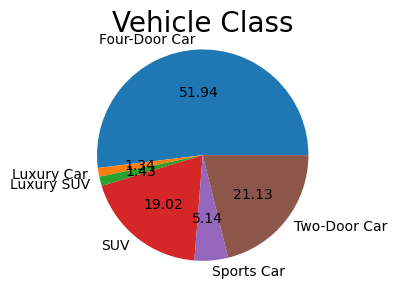

In [18]:
# Pie Chart

plt.figure(figsize=(3,3))
plt.pie(clv2['count'],
        labels=clv2['Vehicle Class'],
        autopct='%.2f')
plt.axis('equal')
plt.title('Vehicle Class', size=20)
plt.show()

Interpretasi:

- Pemilik mobil pintu empat sangat mendominasi komposisi nasabah sedangkan sebaliknya mobil bertipe mewah sangat minim.

- Hal ini menunjukkan bahwa perusahaan harus fokus kepada pasar keluarga dan kelas menengah

## B.12 Proporsi Fitur Coverage

In [19]:
# Tabel

clv1 = clv.groupby(['Coverage'])
clv3 = clv1[['Coverage']].value_counts().reset_index()
clv3

,Coverage,count
0,Basic,2867
1,Extended,1358
2,Premium,390


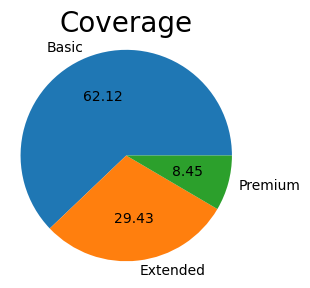

In [20]:
# Pie Chart

plt.figure(figsize=(3,3))
plt.pie(clv3['count'],
        labels=clv3['Coverage'],
        autopct='%.2f')
plt.axis('equal')
plt.title('Coverage', size=20)
plt.show()

Interpretasi:

- Jenis pertanggungan asuransi yang digemari oleh nasabah terlihat didominasi oleh tipe basic

- Untuk itu perusahaan harus lebih kreatif dalam menciptakan fitur-fitur baru dalam produk basic ini guna meningkatkan penjualan

## B.13 Proporsi Fitur Renew Offer Type	

In [21]:
# Tabel

clv1 = clv.groupby(['Renew Offer Type'])
clv4 = clv1[['Renew Offer Type']].value_counts().reset_index()
clv4

,Renew Offer Type,count
0,Offer1,1843
1,Offer2,1525
2,Offer3,711
3,Offer4,536


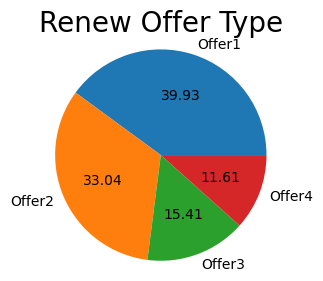

In [22]:
# Pie Chart

plt.figure(figsize=(3,3))
plt.pie(clv4['count'],
        labels=clv4['Renew Offer Type'],
        autopct='%.2f')
plt.axis('equal')
plt.title('Renew Offer Type', size=20)
plt.show()

Interpretasi:

- Untuk pembaruan polis asuransi, mayoritas nasabah hanya ditawarkan tipe 1 dan 2

## B.11 Proporsi Fitur EmploymentStatus

In [23]:
# Tabel

clv1 = clv.groupby(['EmploymentStatus'])
clv5 = clv1[['EmploymentStatus']].value_counts().reset_index()
clv5

,EmploymentStatus,count
0,Disabled,207
1,Employed,2866
2,Medical Leave,218
3,Retired,153
4,Unemployed,1171


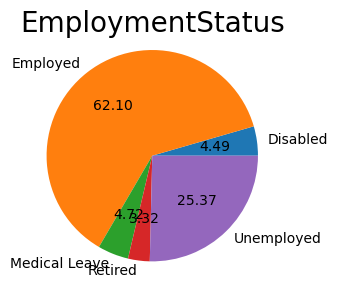

In [24]:
# Pie Chart

plt.figure(figsize=(3,3))
plt.pie(clv5['count'],
        labels=clv5['EmploymentStatus'],
        autopct='%.2f')
plt.axis('equal')
plt.title('EmploymentStatus', size=20)
plt.show()

Interpretasi:

- Mayoritas nasabah berada dalam posisi bekerja. Hal ini wajar mengingat bahwa tentu saja membutuhkan pendapatan untuk dapat membayar polis.
- Namun yang menarik di sini adalah ada angka tidak bekerja yang cukup tinggi. Untuk itu dibutuhkan pendalaman akan hal ini.

## B.11 Proporsi Fitur Marital Status	

In [25]:
# Tabel

clv1 = clv.groupby(['Marital Status'])
clv6 = clv1[['Marital Status']].value_counts().reset_index()
clv6

,Marital Status,count
0,Divorced,681
1,Married,2725
2,Single,1209


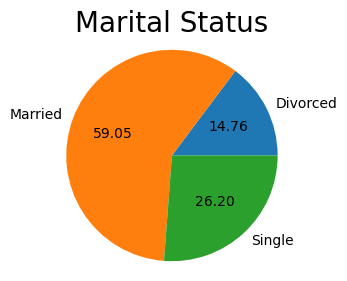

In [26]:
# Pie Chart

plt.figure(figsize=(3,3))
plt.pie(clv6['count'],
        labels=clv6['Marital Status'],
        autopct='%.2f')
plt.axis('equal')
plt.title('Marital Status', size=20)
plt.show()

Interpretasi:

- Mayoritas nasabah berada dalam status menikah. Hal ini menunjukkan kesadaran yang lebih tinggi pada kelompok masyarakat yang berkeluarga terhadap pentingnya asuransi. Khususnya dalam hal ini adalah asuransi kendaraan
- Untuk itu marketing perusahaan dapat menggunakan kategori ini guna membidik nasabah yang potensial

## B.11 Proporsi Fitur Education

In [27]:
# Tabel

clv1 = clv.groupby(['Education'])
clv7 = clv1[['Education']].value_counts().reset_index()
clv7

,Education,count
0,Bachelor,1378
1,College,1377
2,Doctor,185
3,High School or Below,1311
4,Master,364


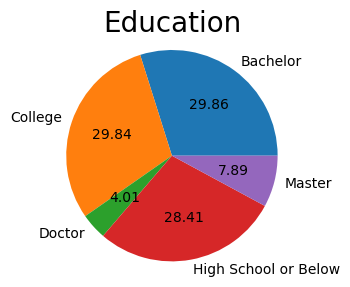

In [28]:
# Pie Chart

plt.figure(figsize=(3,3))
plt.pie(clv7['count'],
        labels=clv7['Education'],
        autopct='%.2f')
plt.axis('equal')
plt.title('Education', size=20)
plt.show()

Interpretasi:
- Ternyata mayoritas nasabah berada pada level pendidikan college, bachelor, dan high school or below secara hampir proporsional.
- Tim marketing dapat menggunakan ketiga kategori ini untuk membidik pasar yang potensial.

# **C. DATA PREPARATION**

## C.1 Data Spliting

In [29]:
# Memisahkan Target dengan Feature
X = clv.drop("Customer Lifetime Value", axis = 1)   # Feature
y = clv["Customer Lifetime Value"]                  # Target 

In [30]:
# Memisahkan antara train set dan test set

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2020)                                                               

## C.2 Encoding

In [31]:

# Mapping ordinal encoder
cover_map = [{"col" : "Coverage",
                   "mapping" : {None : 0, "Basic" : 1,"Extended" : 2, "Premium" : 3}}]
offer_map = [{"col" : "Renew Offer Type",
                "mapping" : {None : 0, "Offer1" : 1,"Offer2" : 2, "Offer3" : 3, "Offer4" : 4}}]
edu_map = [{"col" : "Education",
                      "mapping" : {None : 0, "High School or Below" : 1,"College" : 2, "Bachelor" : 3, "Master" : 4, "Doctor" : 5}}]


transformer = ColumnTransformer([
    ("onehot", OneHotEncoder(drop = "first"), ["Vehicle Class", "EmploymentStatus", "Marital Status"]), # Onehot encoder untuk data nominal
    ("coverage_ordinal", ce.OrdinalEncoder(mapping = cover_map), ["Coverage"]),                   # Ordinal encoder untuk data ordinal
    ("rot_ordinal", ce.OrdinalEncoder(mapping = offer_map), ["Renew Offer Type"]),                     # ---------------//-----------------
    ("education_ordinal", ce.OrdinalEncoder(mapping = edu_map), ["Education"])                 # ---------------//-----------------
], remainder = "passthrough")

# D. MODELING

## D.1 Benchmark Model

In [32]:
# Benchmark models (4 kandidat model)

lasso = Lasso(alpha=1)

knn = KNeighborsRegressor(n_neighbors=5)

tree = DecisionTreeRegressor(criterion='absolute_error', min_samples_leaf=1, max_depth=5, random_state=0)

xgb = XGBRegressor(max_depth = 3, random_state = 2020)

## D.2 Cross Validasi 

In [33]:
# pilihan model algoritma

models = [lasso, knn, tree, xgb]

nilai_mean = []
nilai_std = []

# mencari model terbaik berdasarkan MAE terkecil
for i in models:

    # Pipeline berisi 3 tahap, untuk diisi di pada estimator di cross val
    estimator=Pipeline([
                        ('preprocess', transformer),
                        ('scaler', RobustScaler()),
                        ('model', i)
                    ])

    # cross val
    model_cv = cross_val_score(
        estimator = estimator, 
        X = X_train, # menggunakan X_train awal (karena transform dan scaling dilakukan di Pipeline)
        y = y_train, 
        cv = 5,
        scoring = 'neg_mean_absolute_error'
        )

    nilai_mean.append(model_cv.mean())
    nilai_std.append(model_cv.std())

    print(model_cv, i)

[-2082.86956233 -2092.05311311 -2096.70881583 -2173.67355402
 -2066.6266246 ] Lasso(alpha=1)
[-1713.26915068 -1722.54746229 -1726.68942339 -1773.70704522
 -1769.05132421] KNeighborsRegressor()
[-526.67868726 -491.13160165 -449.16466014 -524.51540926 -470.16813788] DecisionTreeRegressor(criterion='absolute_error', max_depth=5, random_state=0)
[-425.53885103 -426.98401106 -413.23424607 -453.22541019 -427.81462428] XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing

## D.3 Perbandingan Performa Model

In [34]:
# Perbandingan performa antar model

pd.DataFrame({
    'model':['Lasso', 'KNN Regressor', 'Decision Tree Regressor', 'Extreme Gradient Boost'],
    'mean': nilai_mean,
    'std': nilai_std
})

,model,mean,std
0,Lasso,-2102.386334,37.095926
1,KNN Regressor,-1741.052881,25.182940
2,Decision Tree Regressor,-492.331699,30.237605
3,Extreme Gradient Boost,-429.359429,13.055516


### **Interpretasi**

- Dari ketiga model yang dicoba, ternyata model Extreme Gradient Boost menghasilkan error yang paling kecil, dengan perbedaan yang cukup signifikan.
- Extreme Gradient Boost juga paling stabil 
- Untuk selanjutnya, hanya model Extreme Gradient Boost saja yang akan diuji pada test set dan juga dilakukan tuning.

## **E. EVALUASI MODEL: XGBOOST SEBAGAI MODEL TERPILIH**

Berdasarkan proses seleksi di atas, selanjutnya model yang akan digunakan dan dievaluasi adalah XGBoost

## E.1 Model Evaluation Menggunakan Hyperparameter Tuning XGBoost Pada Train Set
Cari hyperparameter terbaik untuk Extreme Gradient Boost

### E.1.1 Buat Hyperparameter 

In [35]:
# Buat hyperparameter yang akan diisikan pada model XGB

hyperparam_space = {
    'model__criterion':['absolute_error','squared_error'],                    # benchmark: absolute_error
    'model__min_samples_leaf': [1, 5, 10, 15, 20, 50],                        # benchmark: 1
    'model__max_depth':[5, 6, 7, 8, 9, 10]                                    # benchmark: 5
    # 'scaler':[StandardScaler(), MinMaxScaler(), RobustScaler()]
} 

### E.1.2 Buat Pipeline dan Grid Search Untuk Menentukan Hyperparameter

In [36]:
# model benchmark
xgb = XGBRegressor(max_depth = 3, random_state = 2020)

# model dalam pipeline
xgb_pipeline = Pipeline([
    ('preprocess', transformer),
    ('scaler', RobustScaler()),
    ('model', xgb)
])

# Grid search (mencari hyperparameter terbaik)
grid_search = GridSearchCV(
    estimator = xgb_pipeline,           # model to tune
    param_grid = hyperparam_space,       # hyperparam space
    cv = 5,
    scoring = 'neg_mean_absolute_error', # metric
    n_jobs= -1
) 

In [37]:
# fitting grid_search pada train set

grid_search.fit(X_train, y_train)


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [22:02:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [22:02:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [22:02:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [22:02:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserW

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'EmploymentStatus',
                                                                          'Marital '
                                                                          'Status']),
                                                                        ('coverage_ordinal',
                                                                         OrdinalEncoder(mapping=[{'col': 'Coverage',
                                                                                                  'data_type': dtype('O'),
                                                                                                  'mapping': None        0
Basic       1
Extended    2
Premium     3
dtype: int64}]),
                                                                         ['C...
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=2020, ...))]),
             n_jobs=-1,
             param_grid={'model__criterion': ['absolute_error',
                                              'squared_error'],
                         'model__max_depth': [5, 6, 7, 8, 9, 10],
                         'model__min_samples_leaf': [1, 5, 10, 15, 20, 50]},
             scoring='neg_mean_absolute_error')

In [38]:
#Model yang sudah ditraining (akan disimpan di pickle)

grid_search.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Vehicle Class',
                                                   'EmploymentStatus',
                                                   'Marital Status']),
                                                 ('coverage_ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'Coverage',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': None        0
Basic       1
Extended    2
Premium     3
dtype: int64}]),
                                                  ['Coverage']),
                                                 ('rot_ordinal',
                                                  Ordina...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=10, max_leaves=None,
                              min_child_weight=None, min_samples_leaf=1,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=None,
                              n_jobs=None, ...))])

In [39]:
# score terbaik hasil dari grid_search
print(grid_search.best_score_)

# hyperparameter pada score terbaik hasil dari grid_search
print(grid_search.best_params_)

-326.1693214602848
{'model__criterion': 'absolute_error', 'model__max_depth': 10, 'model__min_samples_leaf': 1}


In [40]:
#model dengan score tertinggi dari 72 kombinasi hyperparameter
pd.DataFrame(grid_search.cv_results_).sort_values(by='mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__criterion,param_model__max_depth,param_model__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
71,0.214651,0.025481,0.004808,0.000290,squared_error,10,50,"{'model__criterion': 'squared_error', 'model__...",-330.335917,-350.401524,-317.318782,-336.711185,-296.0792,-326.169321,18.436044,1
31,0.268873,0.016722,0.011369,0.003257,absolute_error,10,5,"{'model__criterion': 'absolute_error', 'model_...",-330.335917,-350.401524,-317.318782,-336.711185,-296.0792,-326.169321,18.436044,1
66,0.260963,0.017273,0.008762,0.003193,squared_error,10,1,"{'model__criterion': 'squared_error', 'model__...",-330.335917,-350.401524,-317.318782,-336.711185,-296.0792,-326.169321,18.436044,1
35,0.239975,0.013066,0.007888,0.003751,absolute_error,10,50,"{'model__criterion': 'absolute_error', 'model_...",-330.335917,-350.401524,-317.318782,-336.711185,-296.0792,-326.169321,18.436044,1
34,0.261889,0.017230,0.005745,0.001404,absolute_error,10,20,"{'model__criterion': 'absolute_error', 'model_...",-330.335917,-350.401524,-317.318782,-336.711185,-296.0792,-326.169321,18.436044,1


#### Interpretasi:

1. MAE di train set:
    - sebelum hyperparameter tuning: -429.359429 (cross validation pada benchmark model)

    - setelah hyperparameter tuning: -326.16 (grid search)
    
    - Catatan: Biasanya angka MAE semakin kecil semakin baik, namun karena kita menggunakan scoring 'negatif mean absolut error', maka besaran angkanya menjadi terbalik.

1. Hyperparameter tuning berhasil meningkatkan performa model di train set

## **E.2 Model Evaluation XGBoost Dalam Test Set Sebelum Hyperparameter Tuning**

Menggunakan MSE, RMSE, dan MAE

In [41]:
# model terpilih
xgb = XGBRegressor(max_depth = 3, random_state = 2020)

# model terpilih pipeline
xgb_pipeline = Pipeline([
    ('preprocess', transformer),
    ('scaler', RobustScaler()),
    ('model', xgb)
])

# fitting
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Vehicle Class',
                                                   'EmploymentStatus',
                                                   'Marital Status']),
                                                 ('coverage_ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'Coverage',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': None        0
Basic       1
Extended    2
Premium     3
dtype: int64}]),
                                                  ['Coverage']),
                                                 ('rot_ordinal',
                                                  Ordina...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=2020, ...))])

In [42]:
# Prediksi
y_pred = xgb_pipeline.predict(X_test)

In [43]:
# Metric evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)

MSE: 746871.2629687563
RMSE: 864.2171387844355
MAE: 412.29795284453536


## E.3 Evaluasi Model XGBoost Pada Test Set Setelah Hyperparameter Tuning

Menggunakan MSE, RMSE, dan MAE

In [44]:
grid_search.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Vehicle Class',
                                                   'EmploymentStatus',
                                                   'Marital Status']),
                                                 ('coverage_ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'Coverage',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': None        0
Basic       1
Extended    2
Premium     3
dtype: int64}]),
                                                  ['Coverage']),
                                                 ('rot_ordinal',
                                                  Ordina...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=10, max_leaves=None,
                              min_child_weight=None, min_samples_leaf=1,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=None,
                              n_jobs=None, ...))])

In [45]:
# Model setelah hyperparameter tuning
best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Vehicle Class',
                                                   'EmploymentStatus',
                                                   'Marital Status']),
                                                 ('coverage_ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'Coverage',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': None        0
Basic       1
Extended    2
Premium     3
dtype: int64}]),
                                                  ['Coverage']),
                                                 ('rot_ordinal',
                                                  Ordina...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=10, max_leaves=None,
                              min_child_weight=None, min_samples_leaf=1,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=None,
                              n_jobs=None, ...))])

In [46]:
# predict
y_pred_best = best_model.predict(X_test)

In [47]:
# Score pada test set setelah hyperparameter tuning
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
mae_best = mean_absolute_error(y_test, y_pred_best)

print('MSE:', mse_best)
print('RMSE:', rmse_best)
print('MAE:', mae_best)

MSE: 896385.0467297685
RMSE: 946.7761333756615
MAE: 347.88525441977635


## E.4. Perbandingan Performa XGBoost Pada Test Set Sebelum dan Setelah hyperparameter Tuning

In [48]:
pd.DataFrame({
    'Metrics->':['Before tuning', 'After tuning'],
    'MSE':[mse,mse_best],
    'RMSE':[rmse,rmse_best], 
    'MAE':[mae, mae_best]
})

,Metrics->,MSE,RMSE,MAE
0,Before tuning,746871.262969,864.217139,412.297953
1,After tuning,896385.046730,946.776133,347.885254


## E.6 Penentuan Hyperparameter XGBoost Terbaik

In [49]:
grid_search.best_params_

{'model__criterion': 'absolute_error',
 'model__max_depth': 10,
 'model__min_samples_leaf': 1}

## **Interpretasi**

- Hyperparameter tuning berhasil meningkatkan performa model 'Extreme Gradient Boost' pada data test set. Ditunjukkan dari angka MAE yang menurun 
    - MAE sebelum tuning: 412.297953 
    - MAE setelah tuning: 347.885254 (grid search). 

- Hyperparameter terbaik berdasarkan GridSearch adalah 
    - 'model__criterion': 'absolute_error',
    - 'model__max_depth': 10,
    - 'model__min_samples_leaf': 1
    
- Jika masih ingin mencoba meng-improve model Decision Tree ini, kita bisa coba melakukan tuning pada scaler, atau bisa juga mencoba menganti angka pada hyperparam_space.

# **F. INTERPRETASI MODEL**

## F.1 Signifikansi Model Extreme Gradient Boost

- Extreme Gradient Boost atau kerap disebut XGBoost adalah model machine learning yang mengaplikasikan model Gradient Boosting berdasarkan decision trees.

- XGBoost merupakan model ensemble machine learning similar type yang dapat menyelesaikan masalah klasifikasi maupun regresi. Model Ensemble di sini berarti menggabungkan sejumlah model machine learning, dapat berbeda tipe (various type) atau bertime sama (similar type), guna mendapatkan hasill prediksi yang lebih akurat.

- Secara singkat cara kerja dari XGBoost adalah didasarkan kepada Decision Tree secara iteratif. Setiap pohon dianggap sebagai 'weak learner' karena biasnya yang tinggi. Lalu XGBoost mulai membangun pohon pertamanya yang dianggap memiliki performa rendah. Kemudian ia membangun pohon yang baru lagi yang dilatih untuk memprediksi apa yang pohon pertama tidak dapat lakukan. Teknik ini secara sequensial memproduksi 'weak learners', yang memperbaiki pohon sebelumnya hingga kondisi untuk berhenti terpenuhi. 

- XGBoost memiliki keunggulan yaitu tingkat akurasi yang lebih tinggi dan proses training yang cepat serta dapat bekerja secara paralel disepanjang cluster.

- Akurasi prediksi dari XGBoost yang lebih tinggi dibandingkan model-model lainnya terlihat pada hasil tes di atas.



## F.2 Feature Importance Pada Extreme Gradient Boost

In [50]:
# Mendapatkan nama kolom dari tahapan preprocessing sebelumnya
features = (list(best_model[0].transformers_[0][1].get_feature_names_out()) +
            best_model[0].transformers_[1][2] +
            best_model[0].transformers_[2][2] +
            best_model[0].transformers_[3][2] +
            list(X_train.columns[best_model[0].transformers_[4][2]]))


In [51]:
xgb_importance = pd.DataFrame({
    'feature':features,
    'importance':xgb.feature_importances_
}).sort_values('importance', ascending=False)

xgb_importance

,feature,importance
14,Number of Policies,0.666229
15,Monthly Premium Auto,0.216918
5,EmploymentStatus_Employed,0.029700
7,EmploymentStatus_Retired,0.023912
9,Marital Status_Married,0.011956
10,Marital Status_Single,0.009887
4,Vehicle Class_Two-Door Car,0.009848
17,Income,0.007193
16,Total Claim Amount,0.006394
8,EmploymentStatus_Unemployed,0.005062


Text(0.5, 1.0, 'Feature Importance')

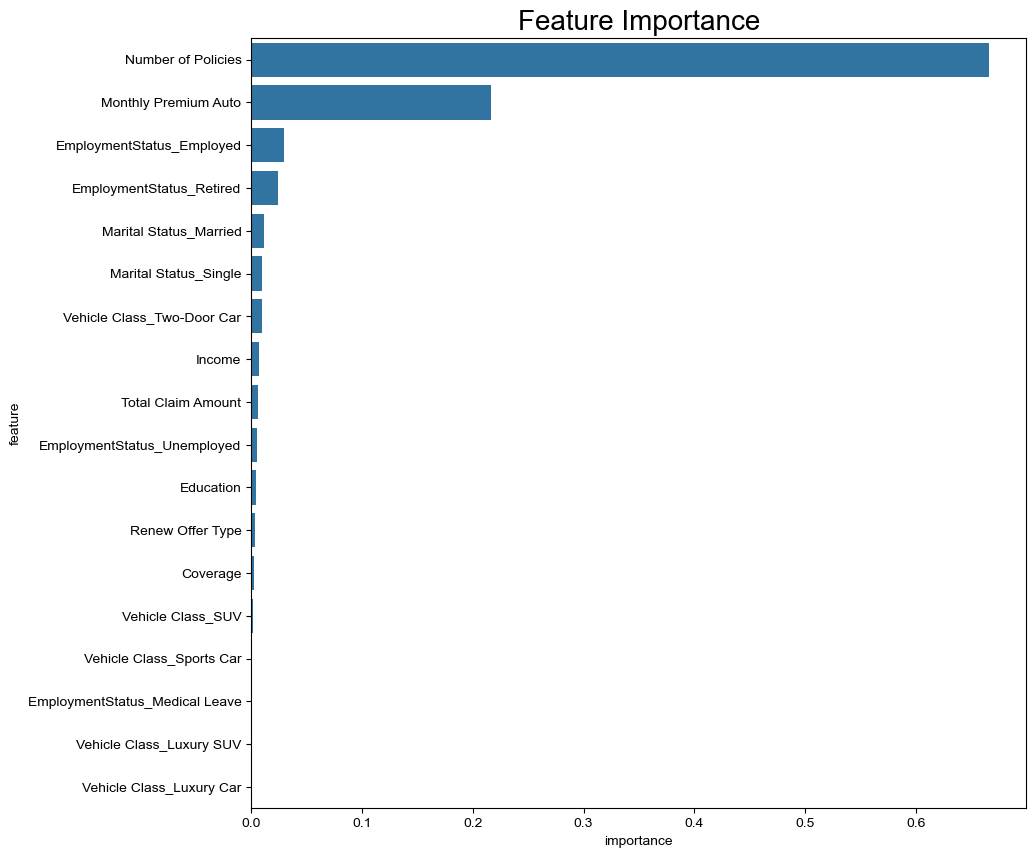

In [52]:
#Membuat barplot rata-rata (median) 'price  per 'neighborhood'

plt.figure(figsize=(10,10))
sns.barplot(data=xgb_importance, y='feature', x='importance')
sns.set_style('whitegrid')
plt.title("Feature Importance",size=20)

Interpretasi:

- Data feature importance pada Extreme Gradient Boost kita menunjukkan bahwa Number of Policy dan Monthly Premium Auto memiliki nilai importance yang jauh melebihi fitur-fitur yang lain.

- Namun yang menarik, secara kategorikal status pekerja, pensiunan, serta menikah dan single juga cukup menonjol dalam hal nilai importance

- Sedangkan nilai yang dianggap paling tidak penting dalam model adalah nasabah yang memiliki mobil mewah. Baik sedan maupun SUV mewah memiliki nilai feature importance nol.

- Perusahaan dapat memanfaatkan fitur-fitur yang menonjol ini untuk meningkatkan nilai Customer Lifetime Value-nya.

## Aktual VS Prediction Value Pada Extreme Gradient Boost

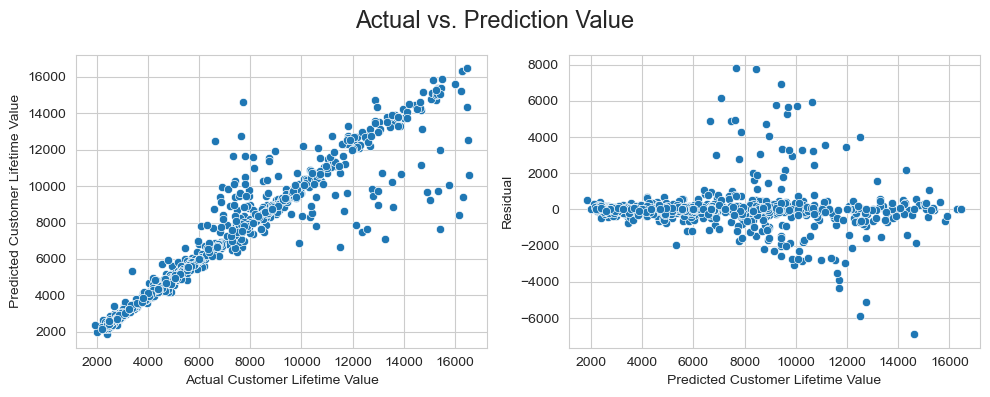

In [53]:
fig, axs =  plt.subplots(1, 2, figsize=(10, 4), facecolor = "none")

sns.scatterplot(y = y_pred_best, x = y_test, ax = axs[0])
axs[0].set_xlabel("Actual Customer Lifetime Value")
axs[0].set_ylabel("Predicted Customer Lifetime Value")

sns.scatterplot(x = y_pred_best, y = y_test - y_pred_best, ax = axs[1])
axs[1].set_xlabel("Predicted Customer Lifetime Value")
axs[1].set_ylabel("Residual")

fig.suptitle("Actual vs. Prediction Value", size = 17)
fig.tight_layout()

Interpretasi:

- Grafik scatter plot di atas menunjukkan plot residual model Extreme Gradient Boost kita. Residual adalah selisih antara nilai aktual dengan nilai prediksi. 

- Pola scaterplot residual yang baik adalah bila tidak ada penyimpangan atau pola-pola khusus yang muncul. Pada grafik di atas menunjukkan sedikit kecenderungan ketika nilai prediksi semakin besar maka error-nya pun semakin besar, terutama pada nilai di atas 8000. 

- Meskipun demikian perubahan pola ini terlihat tidak terlalu parah. Secara keseluruhan scatter plot masih menunjukkan konsistensi linear yang dapat terlihat. Hal ini memperlihatkan bahwa tingkat akurasi prediksi pada model masih dapat diandalkan. 

- Perusahaan dapat mengandalkan model Extreme Gradient Boost ini untuk prediksi peningkatan Customer Lifetime Value.

# **G. KESIMPULAN DAN REKOMENDASI**

## G.1 Kesimpulan

- Pada tahapan benchmarking Model,guna mendapatkan model yang paling akurat dalam prediksi Customer Lifetime Value Purwa Insurance maka dibandingkanlah empat model machine learning yang berbasis regresi, yaitu:
    - Lasso Regression
    - KNN Regression
    - Decision Tree Regression 
    - XGBoost

- Hasil perhitungan mean dan standar deviasi cross validasi di antara keempatnya menunjukkan bahwa XGBoost memiliki tingkat error lebih rendah serta tingkat stabilitas yang lebih tinggi secara signifikan dibandingkan dengan model yang lain.

- Secara umum XGBoosting memang cenderung memiliki keunggulan performa dibandingkan dengan model-model yang lain.

- Selanjutnya pada tahapan evaluasi model untuk menguji train set dan test set serta membandingkannya di saat sebelum dan setelah hyperparameter tuning,hasilnya adalah:
    
    - Pada train set terjadi peningkatan performa (dari -429.35 ke -326.16) dengan menggunakan Mean Absolut Error (MAE) (penggunaan scoring negatif mean absolut error memiliki arti pembacaan MAE menjadi terbalik)

    - Pada test set terjadi peningkatan performa juga melalui pembacaan angka MAE yaitu (dari 412.29 menjadi 347.88)

- Pada pembacaan fitur-fitur yang penting (feature importance) pada model XGBoost menunjukkan bahwa jumlah polis (Number of Policy) dan dan besaran pembayaran premi bulanan (Monthly Premium Auto) memiliki nilai importance yang jauh melebihi fitur-fitur yang lain. Pembacaan ini sinkron dengan hasil matrik korelasi pada analisi EDA yang menghubungkan fitur-fitur dengan target (fitur Customer Lifetime Value)

- Sedangkan nilai yang dianggap paling tidak penting dalam model adalah nasabah yang memiliki mobil mewah. Baik sedan maupun SUV mewah memiliki nilai feature importance nol.

- Pola scaterplot residual menunjukkan sedikit kecenderungan ketika nilai prediksi semakin besar maka error-nya pun semakin besar, terutama pada nilai di atas 8000. Meskipun demikian perubahan pola ini terlihat tidak terlalu parah. 

- Secara keseluruhan scatter plot masih menunjukkan konsistensi linear yang dapat terlihat. Hal ini memperlihatkan bahwa tingkat akurasi prediksi pada model masih dapat diandalkan. 

## G.2 Rekomendasi 

- Dengan menggunakan model XGBoost ini, perusahaan dapat menggunakan berbagai simulasi guna meningkatkan efektifitas dan efisiensi dari strategi perusahaan untuk meningkatkan Customer Lifetime Value-nya.

- Perusahaan harus fokus kepada fitur-fitur yang paling penting sebagaimana yang ditunjukkan oleh model. 

- Berdasarkan model dan analisis data analisis ada beberapa action yang dapat dilakukan perfitur untuk meningkatkan Customer Lifetime Value:

    1. Jumlah polis nasabah: mengingat secara korelasi terhadap CLV dan feature importance  menempati posisi teratas, maka perusahaan harus meletakkan fokus utamanya kepada fitur ini. Perusahaan harus fokus kepada dua hal: marketing polis baru dan maintaining kepada nasabah lama. Harus diingat bahwa nasabah lama penting loyalitas mereka akan bermakna belanja yang lebih besar terhadap perusahaan dan cost perusahaan yang lebih Kecil dibandingkan dengan marketing kepada nasabah baru. Di samping itu guna meningkatkan engagement terhadap nasabah sekaligus lama perusahaan dapat melakukan program referal yaitu menggunakan nasabah lama untuk mendapatkan nasabah baru dengan memberikan imbal hasil berupa referal fee.

    1. Premi bulanan nasabah: fitur ini menduduki posisi kedua baik dalam korelasi maupun feature importance. Fokus dari action kepada fitur ini adalah maintaining nasabah lama. Dalam hal ini nasabah lama harus lebih banyak didengar dan didekati secara aktif melalui berbagai program yang interaktif. Peningkatan kinerja customer service dan sistem reward bagi para nasabah lama akan lebih meningkatkan loyalitas mereka.

    1. Special treatment dan program kepada nasabah lama dengan membagi segmen mereka berdasarkan fitur-fitur yang berkontribusi signifikan, yaitu:
        - Nasabah yang bekerja
        - Nasabah yang menikah
        - Nasabah yang single
        - Nasabah dengan mobil dua pintu dan mobil keluarga yang mengindikasi kuatnya konstribusi segmen kelas menengah
        - Income Nasabah
        - Tingkat pendidikan nasabah

    1. Nasabah yang pensiun dan nasabah tidak bekerja menurut model juga memiliki konstribusi signifikan. Secara logis hal ini terjadi bila nasabah kehilangan penghasilan maka akan berkontribusi terhadap penurunan CLV.  Untuk itu harus ada program penyelamat yang akan menghindari segmen nasabah ini terputus. Misalnya dengan menawarkan program yang lebih ringan preminya atau yang lainnya.
    
    1. Ada beberapa fitur yang menurut model kurang penting terhadap model yaitu yang terkait dengan segmen kelas atas (ditunjukkan dengan fitur mobil mewah yang dianggap model tidak berkontribusi). Untuk meningkatkan kontribusi mereka, maka perusahaan harus mengembangkan program-progam atau polis-polis khusus bagi segmen kelas ini. Tentunya dengan benefit dan prestise yang menyentuh bagi mereka.

    1. Adapun rekomendasi untuk pengembangan model machine learning yang terkait CLV persahaan dapat dilakukan dengan:
        - Uji coba dengan model machine learning lainnya yang mungkin dapat memberikan nilai prediksi lebih baik
        - Uji coba lebih lanjut dengan hyperparameter tunning  lainnya 
        - Penambahan fitur-fitur baru namun dengan tetap mewaspadai over fitting


# **H. SAVE MODEL DENGAN PICKLE**

In [54]:
#SAVE MODEL

filename = 'Model.sav' #nama file yang akan disimpan
pickle.dump(grid_search.best_estimator_, open(filename, 'wb')) #wb untuk menyimpan model


In [55]:
#LOAD MODEL (PANGGIL MODEL)

filename = 'Model.sav' #nama file yang akan disimpan
loaded_model = pickle.load(open(filename, 'rb')) #nama model adalah loaded_model

In [56]:
#Panggil model

loaded_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Vehicle Class',
                                                   'EmploymentStatus',
                                                   'Marital Status']),
                                                 ('coverage_ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'Coverage',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': None        0
Basic       1
Extended    2
Premium     3
dtype: int64}]),
                                                  ['Coverage']),
                                                 ('rot_ordinal',
                                                  Ordina...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=10, max_leaves=None,
                              min_child_weight=None, min_samples_leaf=1,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=None,
                              n_jobs=None, ...))])

In [57]:
#Uji Coba1

clv_noclv = clv.drop(columns=['Customer Lifetime Value']) #kita drop kolom CLV nya yang mau diprediksi
loaded_model.predict(clv_noclv)

array([10082.867 ,  4941.5938, 11982.387 , ..., 12919.43  ,  2446.2244,
        7817.8853], dtype=float32)

In [58]:
#Uji Coba2
#Silakan masukkan input ke paramater yang diinginkan ke dalam [], agar dapat menjadi masukkan 

clv_predict = pd.DataFrame({
    'Vehicle Class': [],
    'Coverage': [],
    'Renew Offer Type': [],
    'EmploymentStatus': [],
    'Marital Status': [],
    'Education': [],
    'Number of Policies': [],
    'Monthly Premium Auto': [],
    'Total Claim Amount': [],
    'Income': []

})